# **TASK 3 : IRIS FLOWER CLASSIFICATION**

**The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
flower_data = pd.read_csv('/content/sample_data/IRIS.csv')


In [3]:
# Display the first few rows of the dataset
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display information about the dataset
flower_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Display summary statistics of the dataset
flower_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Count the occurrences of each species
species_counts = flower_data['species'].value_counts()
species_counts

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

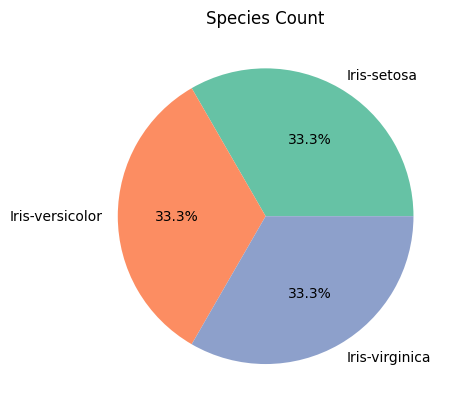

In [27]:
fig, ax = plt.subplots()
ax.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
ax.set_title('Species Count')
plt.show()


In [7]:
# Drop 'sepal_length' column for pairplot
tmp_data = flower_data.drop('sepal_length', axis=1)

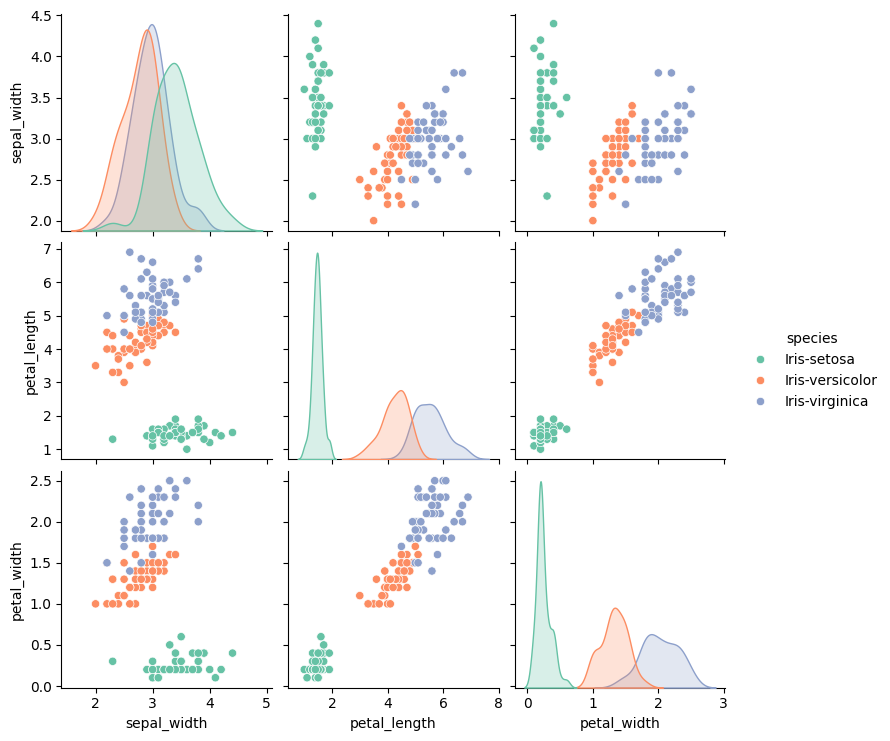

In [8]:
# Create a pairplot with changed marker style
pair_plot = sns.pairplot(tmp_data, hue='species', markers='o')
plt.show()

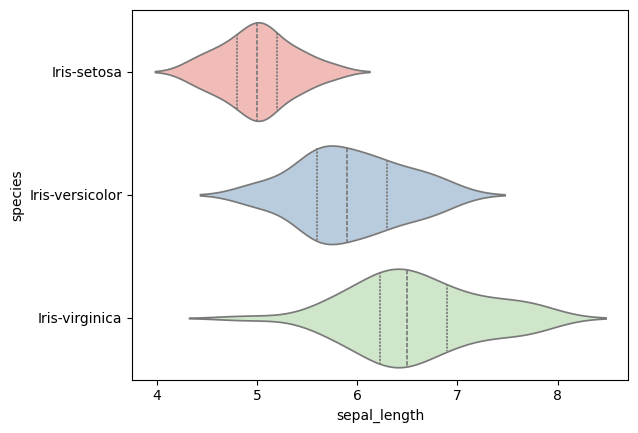

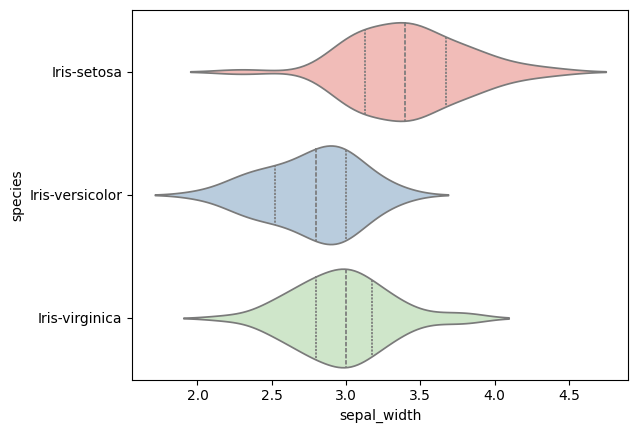

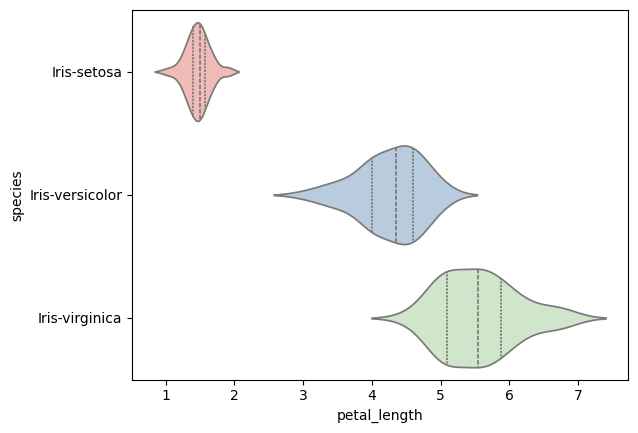

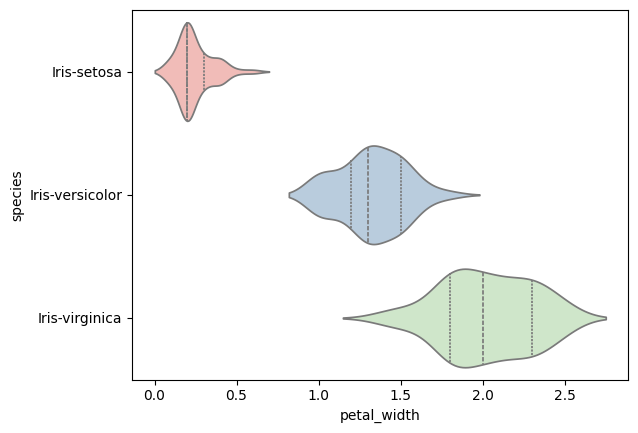

In [9]:
# Create violin plots with changed color
violin_plot1 = sns.violinplot(x='sepal_length', y='species', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()
violin_plot2 = sns.violinplot(y='species', x='sepal_width', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

violin_plot3 = sns.violinplot(y='species', x='petal_length', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

violin_plot4 = sns.violinplot(y='species', x='petal_width', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

In [10]:
# Prepare features and target variable
X_flowers = flower_data.drop(['sepal_length', 'species'], axis=1)
y_flowers = flower_data['species']


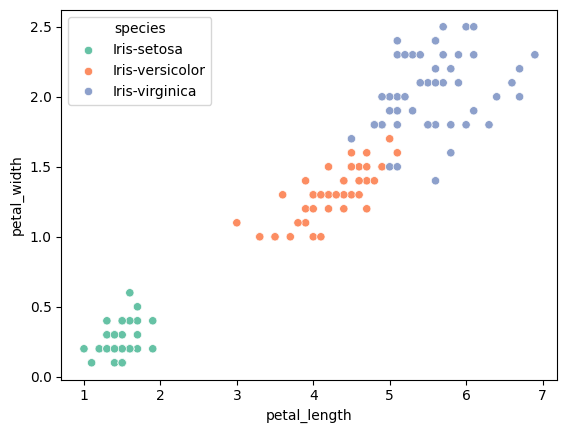

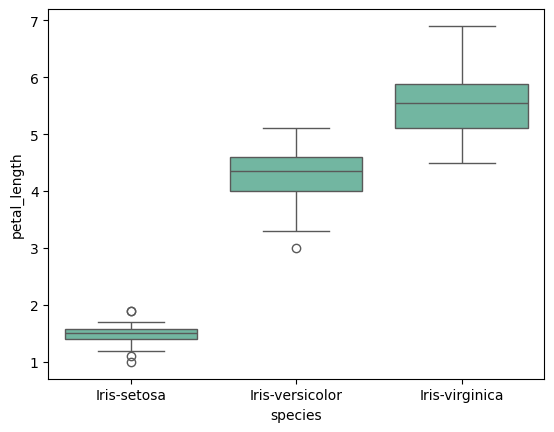

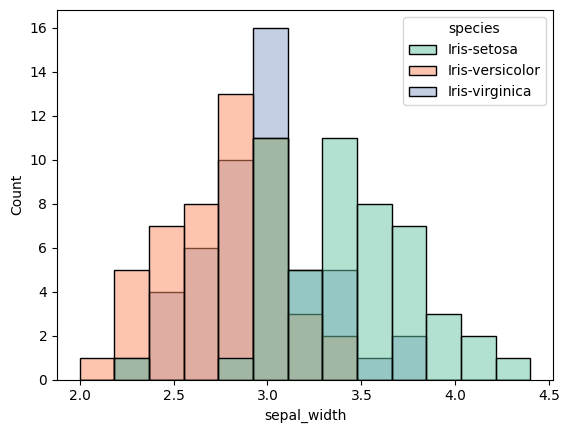

In [29]:
# Create a scatter plot with different colors for each species
sns.scatterplot(x='petal_length', y='petal_width', data=flower_data, hue='species')
plt.show()

# Create a box plot for each species
sns.boxplot(x='species', y='petal_length', data=flower_data)
plt.show()

# Create a histogram for each species
sns.histplot(x='sepal_width', data=flower_data, hue='species')
plt.show()


**Models :**

In [11]:
# Explore different values of k for KNN
k_values = list(range(1, 26))
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_flowers, y_flowers)
    y_pred_knn = knn_model.predict(X_flowers)
    accuracy_scores.append(metrics.accuracy_score(y_flowers, y_pred_knn))


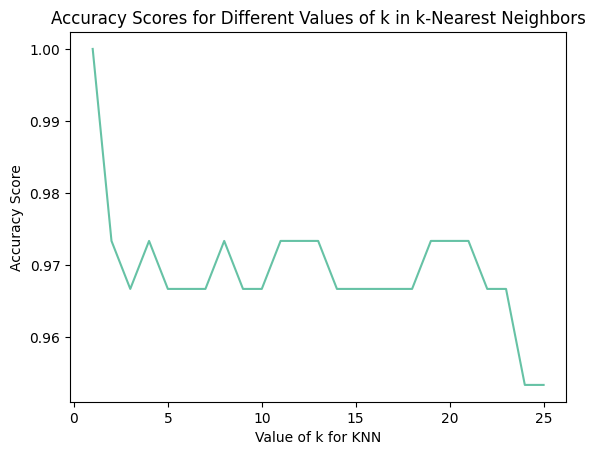

In [12]:
# Plot the accuracy scores
plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of k in k-Nearest Neighbors')
plt.show()

In [13]:
# Fit Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_flowers, y_flowers)
y_pred_logreg = logreg_model.predict(X_flowers)
logreg_accuracy = metrics.accuracy_score(y_flowers, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')

Logistic Regression Accuracy: 0.9800


In [14]:
# Split the data into training and testing sets for both models
X_train_flowers, X_test_flowers, y_train_flowers, y_test_flowers = train_test_split(
    X_flowers, y_flowers, test_size=0.4, random_state=5
)

In [15]:
# Evaluate KNN performance on the testing set
knn_model_test = KNeighborsClassifier(n_neighbors=12)
knn_model_test.fit(X_train_flowers, y_train_flowers)
y_pred_knn_test = knn_model_test.predict(X_test_flowers)
knn_accuracy_test = metrics.accuracy_score(y_test_flowers, y_pred_knn_test)

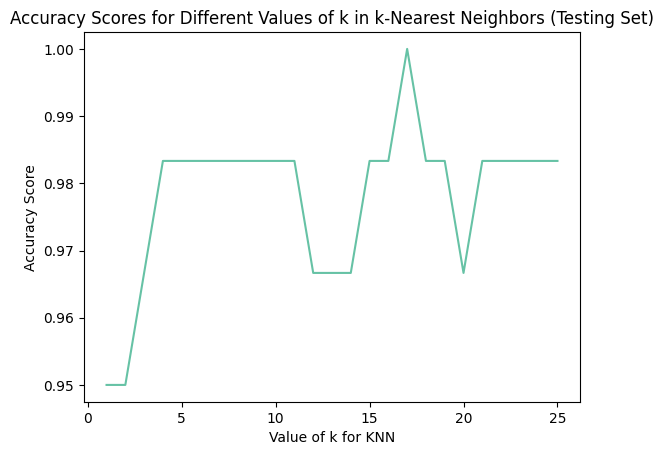

In [16]:
# Plot the accuracy scores for different values of k on the testing set
k_values_test = list(range(1, 26))
accuracy_scores_test = []

for k in k_values_test:
    knn_model_test_k = KNeighborsClassifier(n_neighbors=k)
    knn_model_test_k.fit(X_train_flowers, y_train_flowers)
    y_pred_knn_test_k = knn_model_test_k.predict(X_test_flowers)
    accuracy_scores_test.append(metrics.accuracy_score(y_test_flowers, y_pred_knn_test_k))

plt.plot(k_values_test, accuracy_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of k in k-Nearest Neighbors (Testing Set)')
plt.show()

In [17]:
# Evaluate Logistic Regression performance on the testing set
logreg_model_test = LogisticRegression()
logreg_model_test.fit(X_train_flowers, y_train_flowers)
y_pred_logreg_test = logreg_model_test.predict(X_test_flowers)
logreg_accuracy_test = metrics.accuracy_score(y_test_flowers, y_pred_logreg_test)
print(f'Logistic Regression Accuracy on Testing Set: {logreg_accuracy_test:.4f}')


Logistic Regression Accuracy on Testing Set: 0.9833


In [18]:
# Make a prediction using KNN for an out-of-sample observation
new_flower_data = np.array([[6, 3, 4, 2]])

# Use only the first 3 features of new_flower_data
new_flower_data_subset = new_flower_data[:, :3]

# Ensure that the array has the same number of features as the training data
if new_flower_data_subset.shape[1] != X_train_flowers.shape[1]:
    raise ValueError(f"Number of features in the prediction data ({new_flower_data_subset.shape[1]}) "
                     f"does not match the number of features used for training ({X_train_flowers.shape[1]})")


In [19]:
# Create a DataFrame with the correct column names
new_flower_data_df = pd.DataFrame(new_flower_data, columns=flower_data.columns[:-1])


In [37]:
new_flower_data_df

,sepal_length,sepal_width,petal_length,petal_width
0,6,3,4,2
